In [25]:
import pandas as pd
import requests
import geopandas as gp
import matplotlib as plt

from api_key import geoapify_key

In [26]:
df = pd.read_csv("Resources/meteorite-landings-clean.csv")
df.head()

,Unnamed: 0,name,mass,fall,year,reclat,reclong,GeoLocation
0,0,Aachen,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,1,Aarhus,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,2,Abee,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,3,Acapulco,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,4,Achiras,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [27]:
from shapely.geometry import Point


df_geo = gp.GeoSeries(df.GeoLocation.apply(lambda x: Point(float(x.replace(')','').split(', ')[1]),float(x.replace('(','').split(',')[0]))))
df_geo.head()

0       POINT (6.08333 50.77500)
1      POINT (10.23333 56.18333)
2    POINT (-113.00000 54.21667)
3     POINT (-99.90000 16.88333)
4    POINT (-64.95000 -33.16667)
Name: GeoLocation, dtype: geometry

<AxesSubplot:>

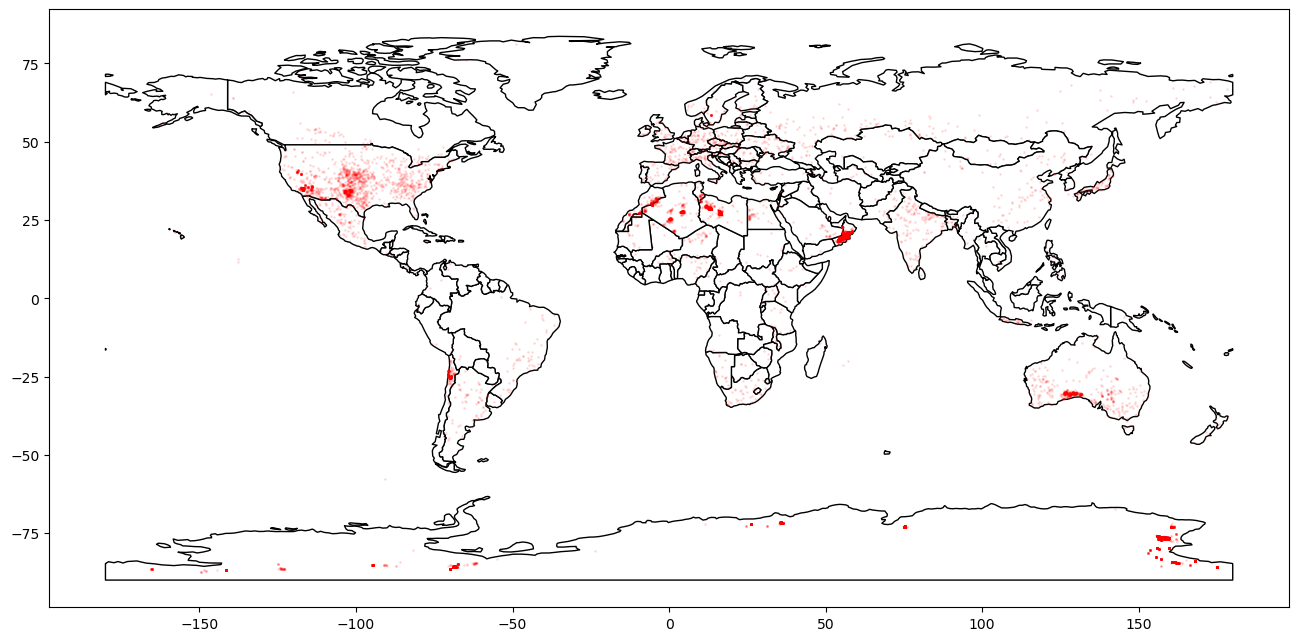

In [31]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black', figsize=(16,10))
df_geo.plot(ax=base, marker='o', color='red', markersize=1, alpha=0.1)